## Notebooks Import and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - Simple cost function

$f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Data
x_1 = np.linspace(start=-3, stop=3, num=100)

<function matplotlib.pyplot.show(close=None, block=None)>

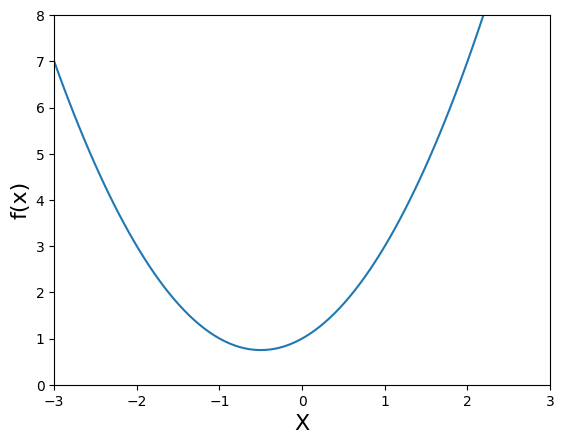

In [4]:
# Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show

## Slope & Derivatives

In [5]:
def df(x):
    return 2*x + 1

<function matplotlib.pyplot.show(close=None, block=None)>

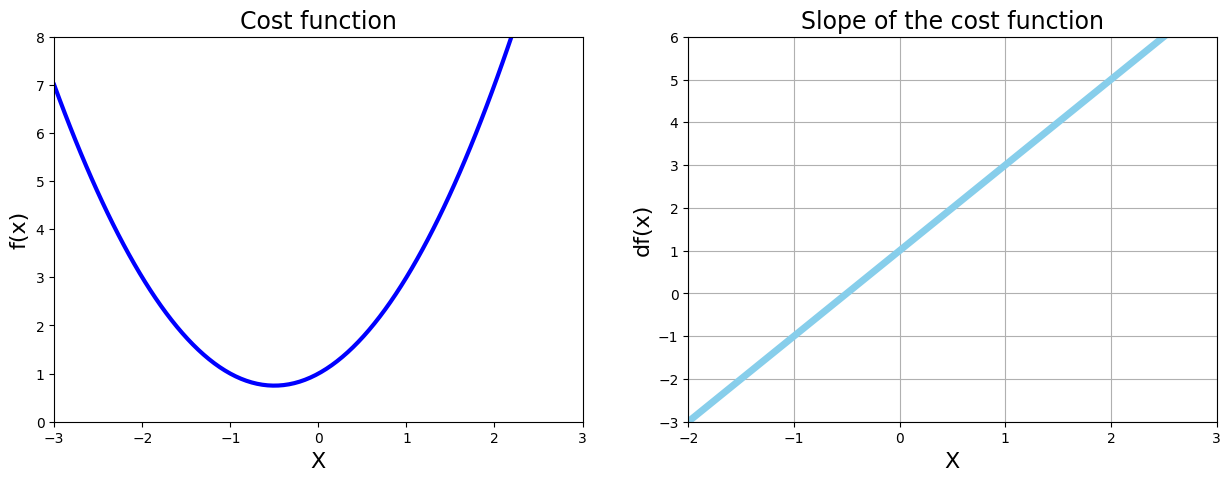

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim([-3,6])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5)

plt.show

## Gradient Descent

In [7]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

while True:
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        break

print(f"Local minimum occurs at: {new_x}")
print(f"Slope or df(x) value at this point is: {df(new_x)}")
print(f"f(x) value or cost at this point is: {f(new_x)}")

Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


<function matplotlib.pyplot.show(close=None, block=None)>

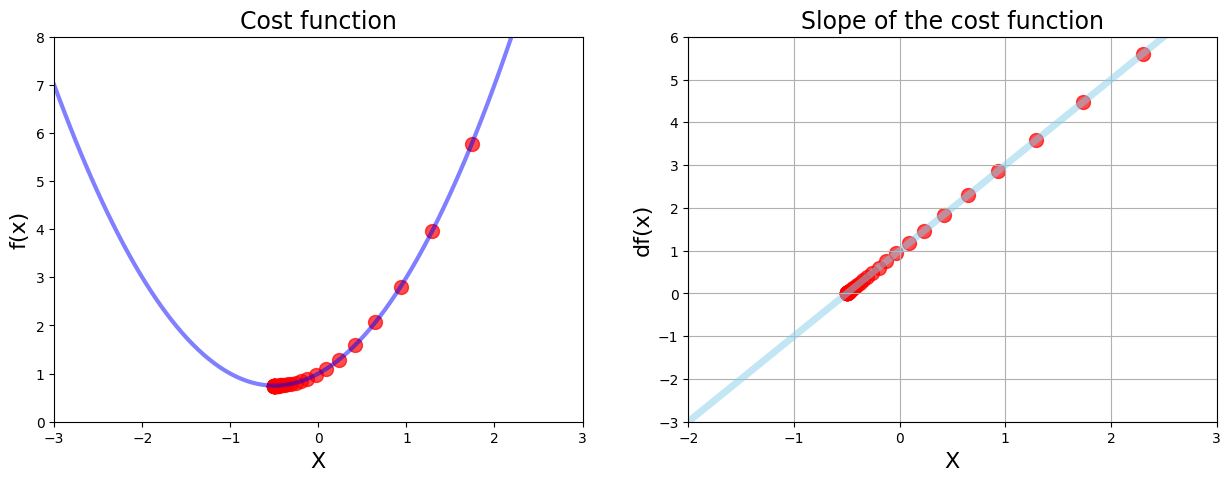

In [8]:
# Superimpose the gradient descent calculations in plot

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.5)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim([-3,6])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5, alpha=0.5)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.7)

plt.show

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

<function matplotlib.pyplot.show(close=None, block=None)>

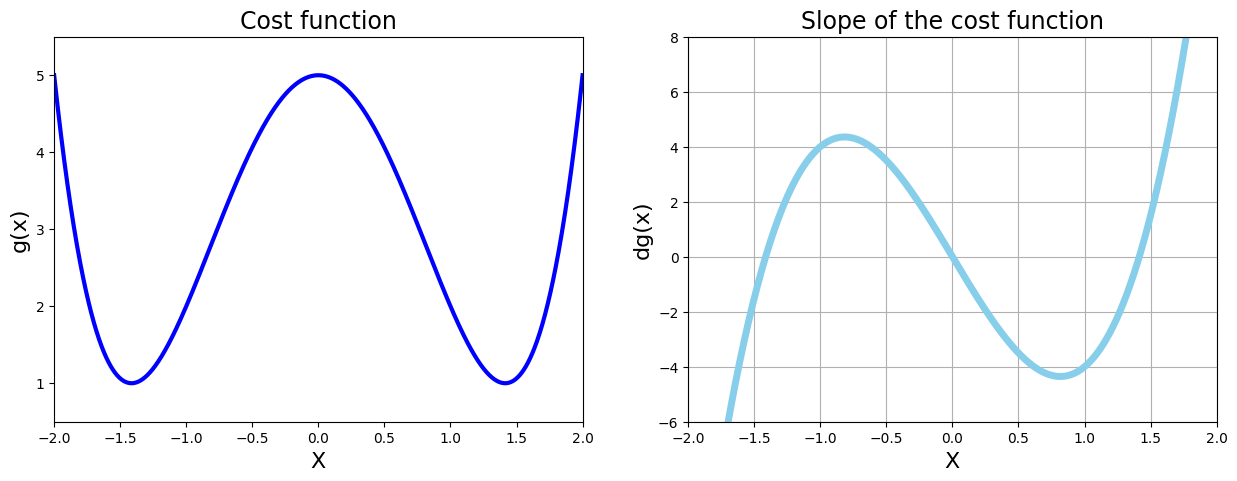

In [11]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5)

plt.show

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    while True:
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.5, 
                                                 multiplier=0.02, 
                                                 precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


<function matplotlib.pyplot.show(close=None, block=None)>

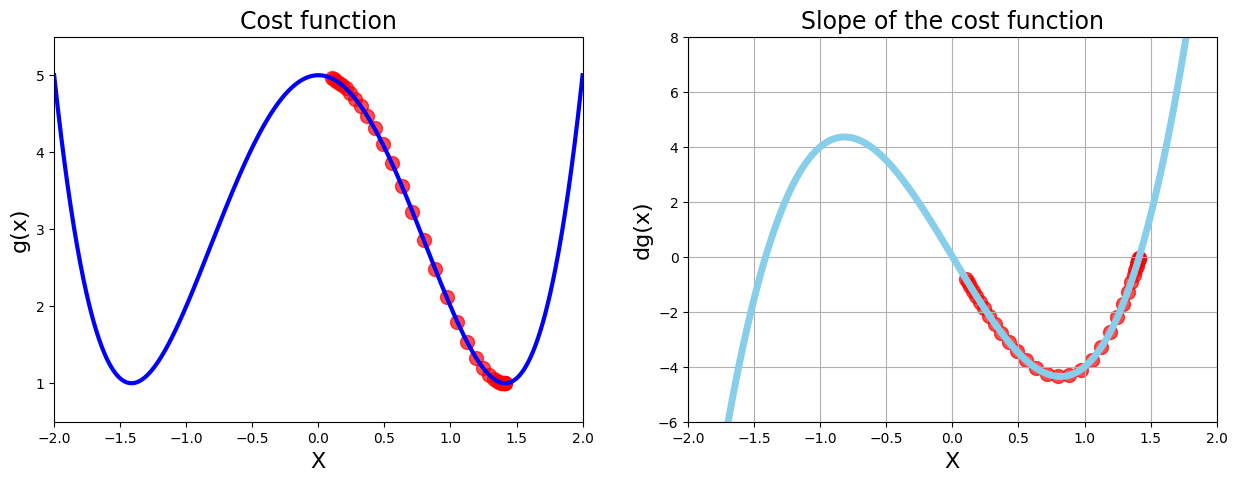

In [16]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.1, 
                                                 multiplier=0.02, 
                                                 precision=0.001)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.7)

plt.show